In [10]:
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

    
df_k = []
df_theta = []

for i in range(1,6):
    df_k.append(pd.read_csv(f'./raw_data/kz_{i}.csv'))
    df_theta.append(pd.read_csv(f'./raw_data/Theta_{i}.csv' ))
    
for i in range(5):
    print(f'kz_{i+1}.csv shape: {df_k[i].shape}')
    print(f'Theta_{i+1}.csv shape: {df_theta[i].shape}')
    
    
# 未解缠的 n_i
n_i = 1

num_rows = 804
num_cols = 2001


kz_1.csv shape: (804, 2001)
Theta_1.csv shape: (804, 2001)
kz_2.csv shape: (804, 2001)
Theta_2.csv shape: (804, 2001)
kz_3.csv shape: (804, 2001)
Theta_3.csv shape: (804, 2001)
kz_4.csv shape: (804, 2001)
Theta_4.csv shape: (804, 2001)
kz_5.csv shape: (804, 2001)
Theta_5.csv shape: (804, 2001)


raw文件读入

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw3D(H):
    N, M = H.shape
    x = np.linspace(1, M, M)
    y = np.linspace(1, N, N)
    x, y = np.meshgrid(x, y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, H, cmap='viridis')

    ax.set_title('Estimated Height')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Height(m)')

    plt.show()

In [1]:
def raw_pic(index):
    
    # 创建空数组存储计算结果
    results = np.zeros((num_rows, num_cols))
    
    # 遍历每个数据点，计算结果
    for i in range(num_rows):
        for j in range(num_cols):
            k_i = df_k[index].iloc[i, j]
            theta_i = df_theta[index].iloc[i, j]
            results[i, j] = -1 / k_i * (theta_i + 2 * math.pi * n_i)
            
    
    # 绘制色度图
    # plt.imshow(results, cmap='viridis')
    # plt.colorbar(label='Height (m)')
    # plt.title('Estimated Heights')
    # plt.show()
    
    

# 原始数据打表

> 先跑一遍原始数据，将n置为0，在不还原高程的情况下看一下相位纠缠导致的结果

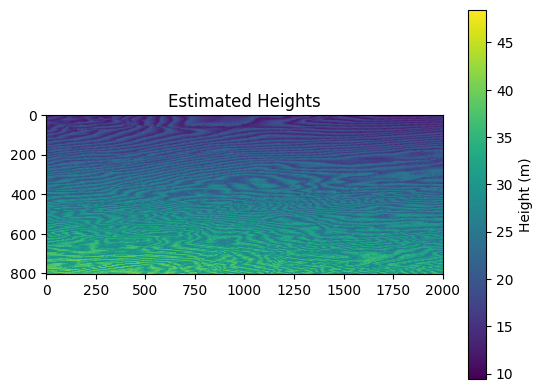

In [9]:
raw_pic(4)

低分图像显示

pic0


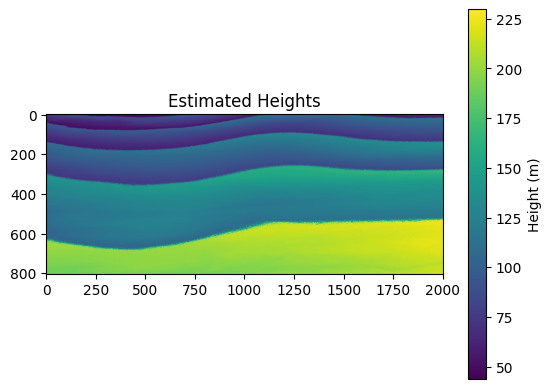

pic1


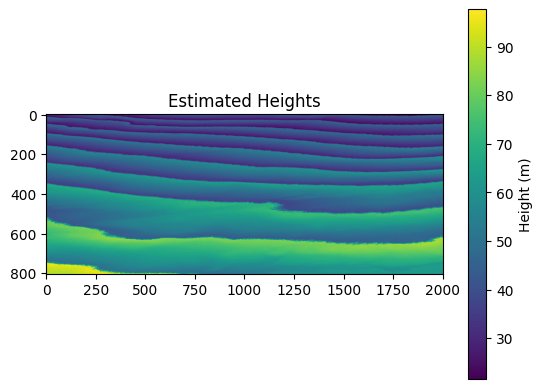

pic2


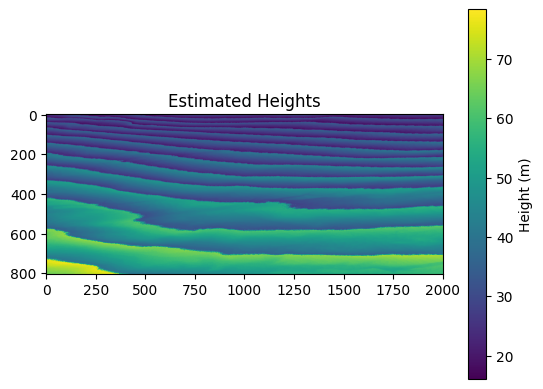

pic3


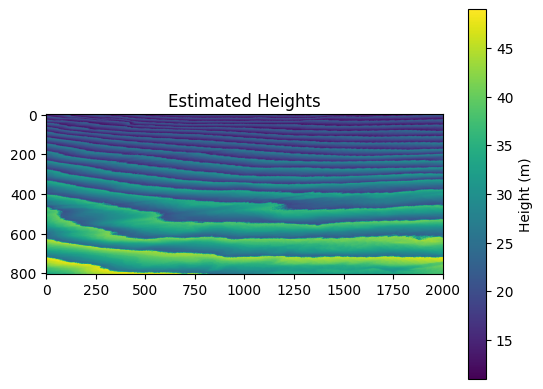

pic4


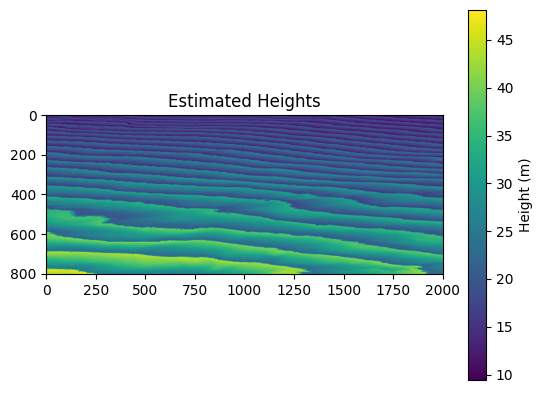

In [11]:
for i in range(5):
    print(f"pic{i}")
    raw_pic(i)

### 发现如同摩尔纹的噪声


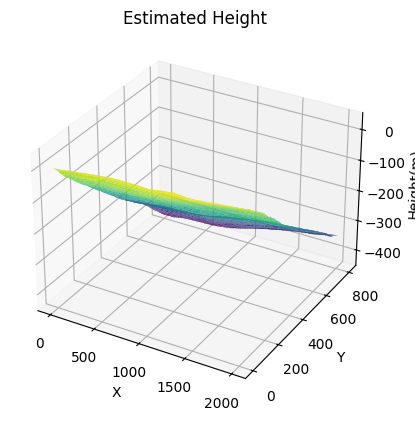

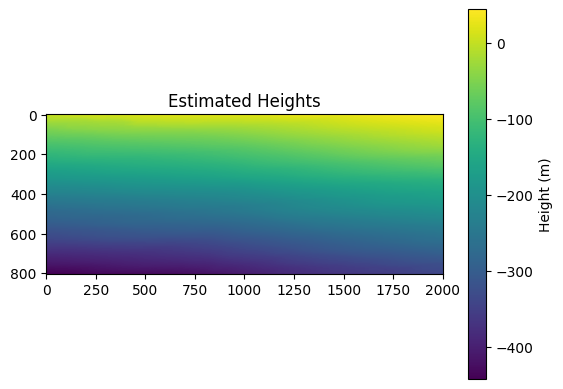

In [48]:


def unwrap_phase(theta):
    # 初始化 phi 矩阵
    phi = np.zeros_like(theta)
    phi[0, 0] = theta[0, 0]
    
    # 展开行
    for i in range(1, theta.shape[0]):
        delta = theta[i, 0] - theta[i-1, 0]
        delta_wrapped = np.mod(delta + np.pi, 2 * np.pi) - np.pi
        phi[i, 0] = phi[i-1, 0] + delta_wrapped
    
    # 展开列
    for j in range(1, theta.shape[1]):
        delta = theta[0, j] - theta[0, j-1]
        delta_wrapped = np.mod(delta + np.pi, 2 * np.pi) - np.pi
        phi[0, j] = phi[0, j-1] + delta_wrapped
    
    # 展开其余矩阵
    for i in range(1, theta.shape[0]):
        for j in range(1, theta.shape[1]):
            delta_row = theta[i, j] - theta[i-1, j]
            delta_col = theta[i, j] - theta[i, j-1]
            delta_row_wrapped = np.mod(delta_row + np.pi, 2 * np.pi) - np.pi
            delta_col_wrapped = np.mod(delta_col + np.pi, 2 * np.pi) - np.pi
            phi[i, j] = phi[i-1, j] + delta_row_wrapped
            phi[i, j] = phi[i, j-1] + delta_col_wrapped
    
    return phi

theta = np.array(df_theta[4])
# 调用函数进行相位展开
phi = unwrap_phase(theta)

# 输出结果
# print(phi)

results = np.zeros((num_rows, num_cols))

# 遍历每个数据点，计算结果
for i in range(num_rows):
    for j in range(num_cols):
        k_i = df_k[4].iloc[i, j]
        results[i, j] = -1 / k_i * phi[i, j]

draw3D(results)

# 绘制色度图
plt.imshow(results, cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Estimated Heights')
plt.show()

# 绘制色度图
# plt.imshow(unwrapped_phase, cmap='viridis')
# plt.colorbar(label='phi')
# plt.title('phi')
# plt.show()




(804, 2001)


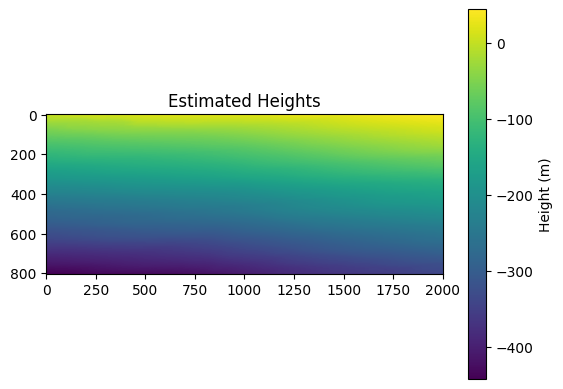

In [13]:
import numpy as np

theta = np.array(df_theta[4]) 

# 使用numpy的unwrap函数对theta进行处理
# 默认情况下，unwrap会沿着最后一个轴处理，对于二维矩阵来说，就是沿着每一行处理
# 如果你想沿着其他轴处理，可以使用axis参数
phix = np.unwrap(theta, axis=1)
phiy = np.unwrap(theta, axis=0)
phi = np.unwrap(phix, axis=0)
print(phi.shape)

results = np.zeros((num_rows, num_cols))

# 遍历每个数据点，计算结果
for i in range(num_rows):
    for j in range(num_cols):
        k_i = df_k[4].iloc[i, j]
        results[i, j] = -1 / k_i * phi[i, j]

# 绘制色度图
plt.imshow(results, cmap='viridis')
plt.colorbar(label='Height (m)')
plt.title('Estimated Heights')
plt.show()
# 如果你想要沿着第一个轴（即列）处理，可以这样做
# phi = np.unwrap(theta, axis=0)

# phi现在是处理过后的矩阵，应该是连续的

# 如果你需要找到对应的n值，可以通过计算原theta和处理后的phi之间的差值除以2π来近似得到


In [34]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


def simulate(size, m_1, m_2, C, A, mu_x, mu_y, sigma_x, sigma_y):
  """
  creates an arbitrary phase map by mixing gaussian blobs and adding ramps
  """
  x = np.arange(0, size[0], 1)
  y = np.arange(0, size[0], 1)
  xx, yy = np.meshgrid(x, y, sparse=True)
  I = np.zeros(size)
  ## mix randomly shaped and placed gaussian blobs
  for i in range(len(sigma_x)):
      a = (xx-mu_x[i])**2/(2*sigma_x[i]**2) + (yy-mu_y[i])**2/(2*sigma_y[i]**2)
      I += A[i]*np.exp(-a)
  ## add ramp phase with random gradients and shifts
  I = m_1*xx + m_2*yy + C + 0.1*I
  return I

def wrap(phi):
  """
  wraps the true phase signal within [-pi, pi]
  """
  return np.angle(np.exp(1j*phi))

def rescale(im, range):
  """
  mini-max rescales the input image
  """
  im_std = (im - im.min()) / (im.max() - im.min())
  im_scaled = im_std * (range[1] - range[0]) + range[0]
  return im_scaled

def create_random_image(size):
  """
  creates an randomly simulated true phase map
  """ 
  array_len = np.random.randint(2, 5)
  m = np.random.uniform(0, 0.5, [2])
  C = np.random.randint(1, 10)
  A = np.random.randint(50, 1000, array_len)
  mu_x = np.random.randint(20, 235, array_len)
  mu_y = np.random.randint(20, 235, array_len)
  sigma_x = np.random.randint(10, 45, array_len)
  sigma_y = np.random.randint(10, 45, array_len)
  I = simulate(size, m[0], m[1], C, A, mu_x, mu_y, sigma_x, sigma_y)
  return I


def plot(*argv, titles=None):
  """
  plots a given number of phase maps
  """
  if len(argv) == 1:
    f, ax = plt.subplots(1, 1, sharey=True, figsize=(5, 5))
    if titles is not None:
      ax.set_title(titles)
    a = ax.imshow(argv[0].squeeze(), cmap='jet')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    f.colorbar(a, cax=cax)
    plt.show()
  else:
    f, axes = plt.subplots(1, len(argv), sharey=True, figsize=(10, 10))
    for i in range(len(argv)):
        if titles is not None:
          axes[i].set_title(titles[i])
        a = axes[i].imshow(argv[i].squeeze(), cmap='jet')
        divider = make_axes_locatable(axes[i])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        f.colorbar(a, cax=cax)
    plt.show()
    f.colorbar(a, cax=cax)

def plot_hist(*argv, titles):
  """
  plots the historgram of the input phase maps
  """
  for i in range(len(argv)):
      hist = np.histogram(argv[i].ravel(), bins=100)
      plt.plot(hist[1][1:], hist[0])
  plt.xlabel("phase values")
  plt.ylabel("frequency")
  plt.title("Histogram Analysis")
  plt.grid()
  if titles is not None:
    plt.legend(titles)
  plt.show()  


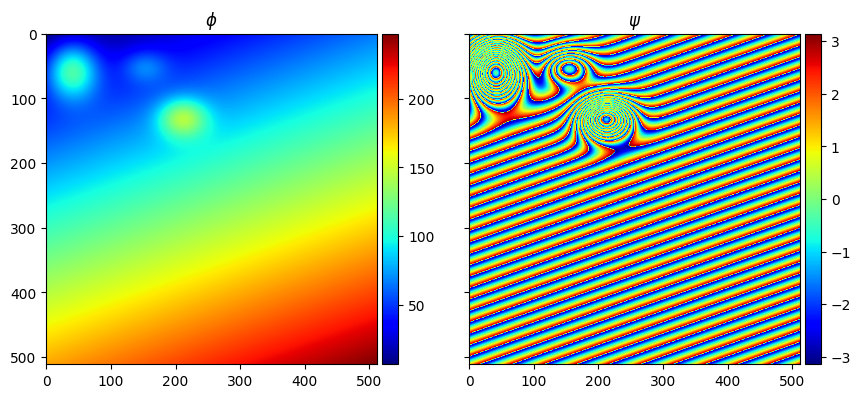

In [45]:
## example
size = (512, 512)
I = create_random_image(size)
I_wrap = wrap(I)
plot(I, I_wrap, titles=["$\phi$", "$\psi$"])

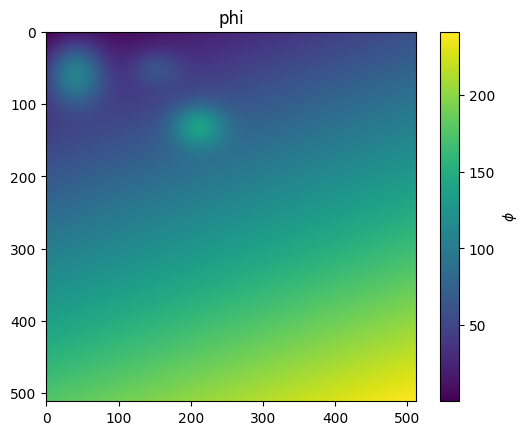

In [46]:
phi = unwrap_phase(I_wrap)

# 绘制色度图
plt.imshow(phi, cmap='viridis')
plt.colorbar(label='$\phi$')
plt.title('phi')
plt.show()
